# DEBUG

In this notebook, we compare the width computed with the high magnification microscope (x100) to those taken with Prince. 

## Setup

In [5]:
from amftrack.util.sys import data_path, get_current_folders_local, update_plate_info_local
from amftrack.util.file import chose_file
from amftrack.util.plot import show_image
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment
import os
import numpy as np
import matplotlib.pyplot as plt
import logging
%matplotlib notebook

In [6]:
directory_name = "width1"
plate_name = "20220325_1423_Plate907"
directory = os.path.join(data_path, directory_name, "full_plates") + "/"

update_plate_info_local(directory)
folder_df = get_current_folders_local(directory)
selected_df = folder_df.loc[folder_df["folder"] == plate_name]
i = 0
plate = int(list(selected_df["folder"])[i].split("_")[-1][5:])
folder_list = list(selected_df["folder"])
directory_name = folder_list[i]
exp = Experiment(plate, directory)
exp.load(
    selected_df.loc[selected_df["folder"] == directory_name], labeled=False
)

analysed:   0%|          | 0/2 [00:00<?, ?it/s]

2022-03-25 14:23:00


In [7]:
selected_df

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/skeleton_masked_compressed.mat,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder
6,/media/felix/AMFtopology02/storage/width1/full...,907,9,'Carrot','A5','001P100N100C','Y','-',20220321,25,...,True,True,False,False,True,True,False,False,"25.03.2022, 14:23:",20220325_1423_Plate907


In [8]:
selected_df = folder_df.loc[folder_df['folder']==plate_name]

In [9]:
i = 0

In [10]:
plate = int(list(selected_df['folder'])[i].split('_')[-1][5:])
folder_list = list(selected_df['folder'])
directory_name = folder_list[i]

In [11]:
exp = Experiment(plate, directory)
exp.load(selected_df.loc[selected_df['folder']==directory_name],labeled=False)

2022-03-25 14:23:00


In [12]:
len(exp.nx_graph[0])

2407

In [13]:
exp.load_tile_information(0)

## 1. Verify that it is the right edge

In [24]:
from amftrack.util.sys import data_path

In [14]:
from amftrack.util.image_analysis import get_transformation
from amftrack.pipeline.functions.image_processing.experiment_util import get_random_edge, plot_edge, find_nearest_edge, get_all_edges, plot_full_image_with_features

In [15]:
from amftrack.util.geometry import (
    generate_index_along_sequence,
    distance_point_pixel_line,
    get_closest_lines,
)

In [26]:
l = []
for key in d:
    l.append([d[key]['x'],d[key]['y']])

In [23]:
l_ = []
for c in l:
    l_.append(f(c))

In [24]:
edges = get_all_edges(exp, 0)

In [26]:
len(edges)

1652

<IPython.core.display.Javascript object>


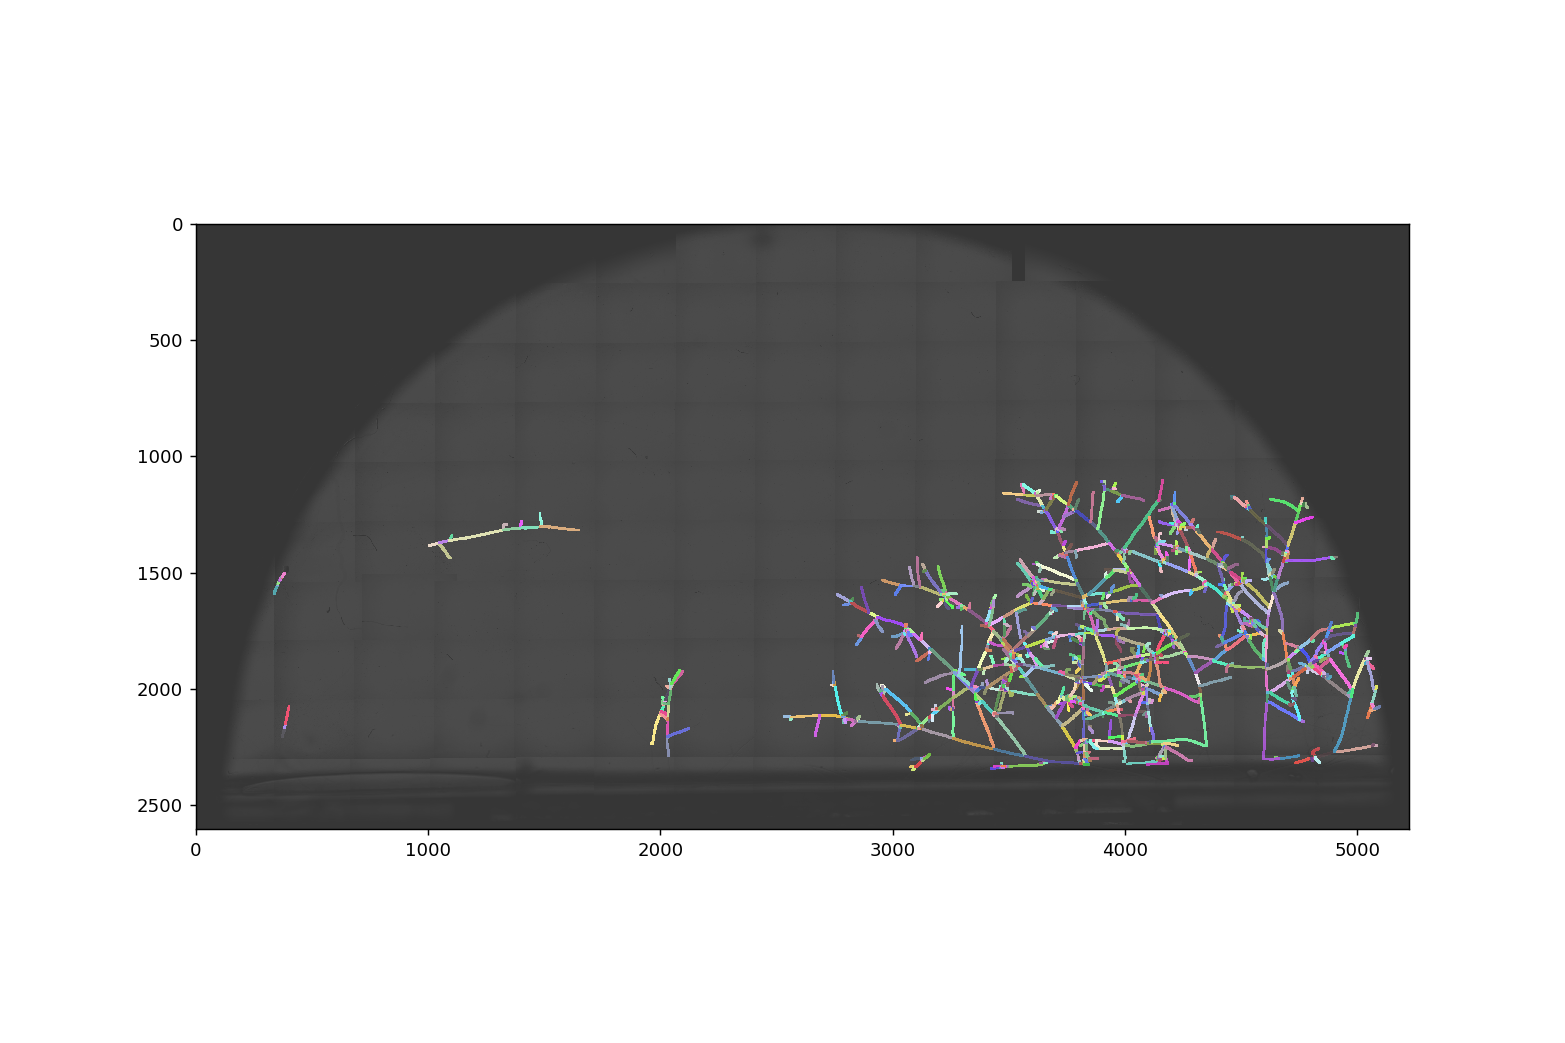

In [25]:
plot_full_image_with_features(exp, 0, downsizing = 10, edges = edges)

In [32]:
def prov(point, exp, t):
    edges = get_all_edges(exp, t)
    l = [edge.pixel_list(t) for edge in edges]
    return edges[get_closest_lines(point, l)[0][0]]

In [52]:
c1 = [35000, 22000]
c2 = [16000, 16500]
c3 = [35000, 20000]

edge1 = prov(exp.timestep_to_general(c1, 0), exp, 0)
edge2 = prov(exp.timestep_to_general(c2, 0), exp, 0)
edge3 = prov(exp.timestep_to_general(c3, 0), exp, 0)

<IPython.core.display.Javascript object>


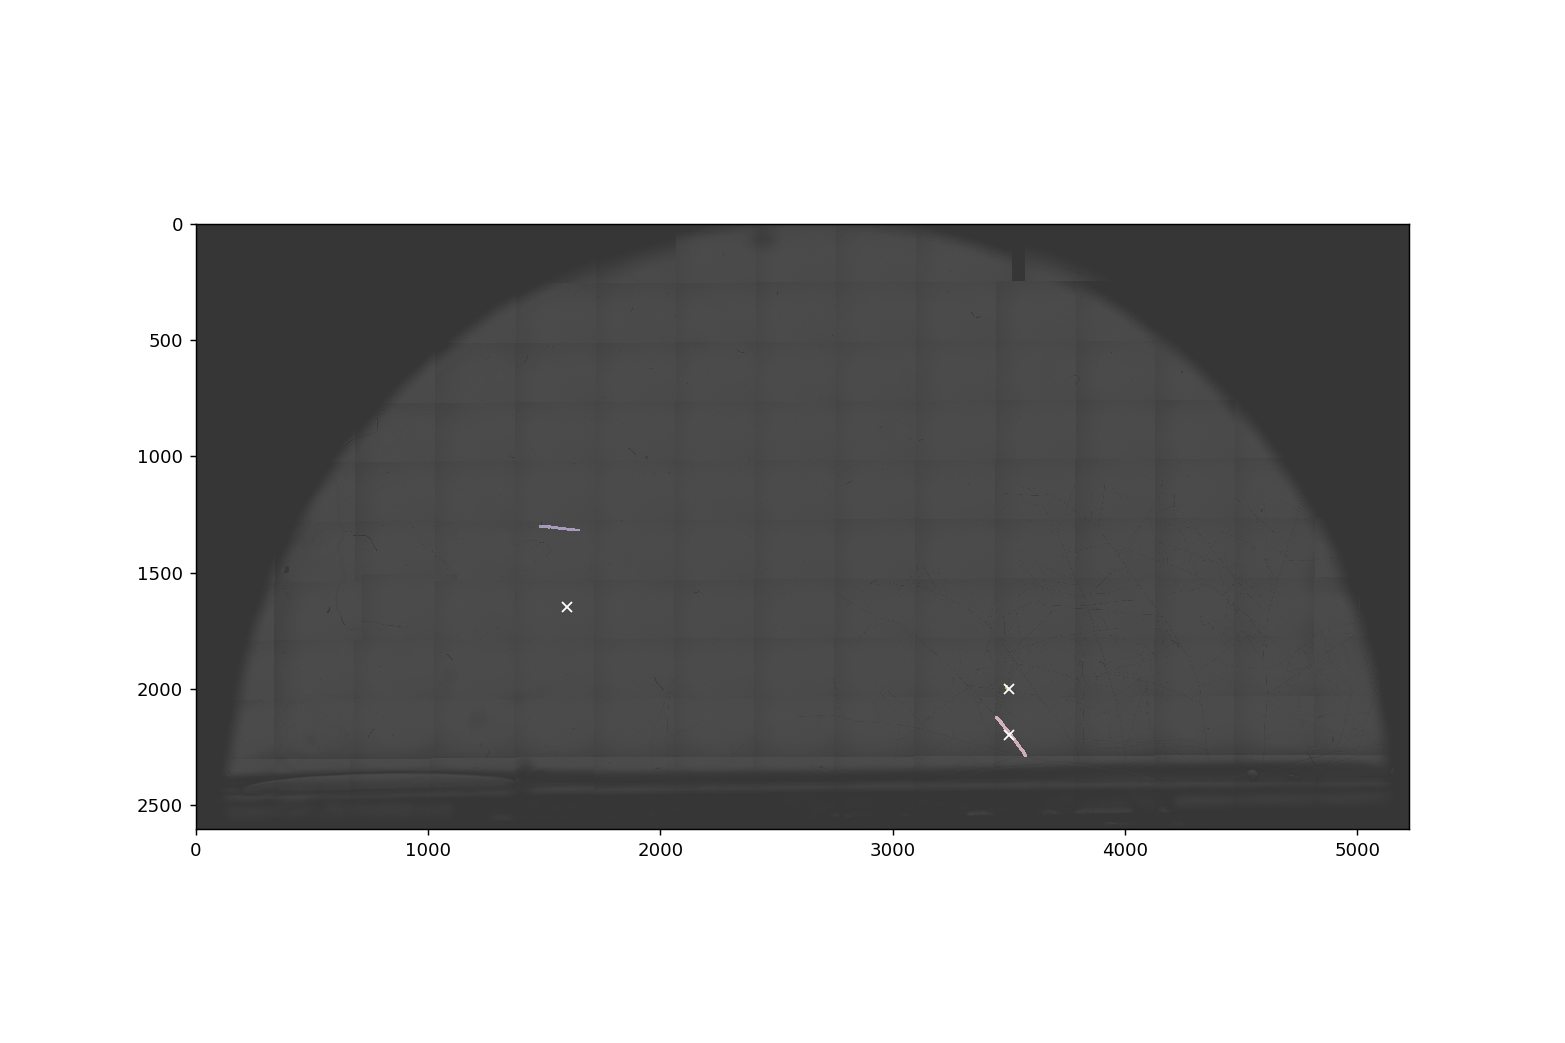

In [53]:
plot_full_image_with_features(exp, 0, downsizing = 10, edges = [edge1, edge2, edge3], points = [c1, c2, c3])

In [54]:
c1 = [30000, 24000]
c2 = [12500, 12500]
c3 = [40000, 20000]

edge1 = prov(exp.timestep_to_general(c1, 0), exp, 0)
edge2 = prov(exp.timestep_to_general(c2, 0), exp, 0)
edge3 = prov(exp.timestep_to_general(c3, 0), exp, 0)

<IPython.core.display.Javascript object>


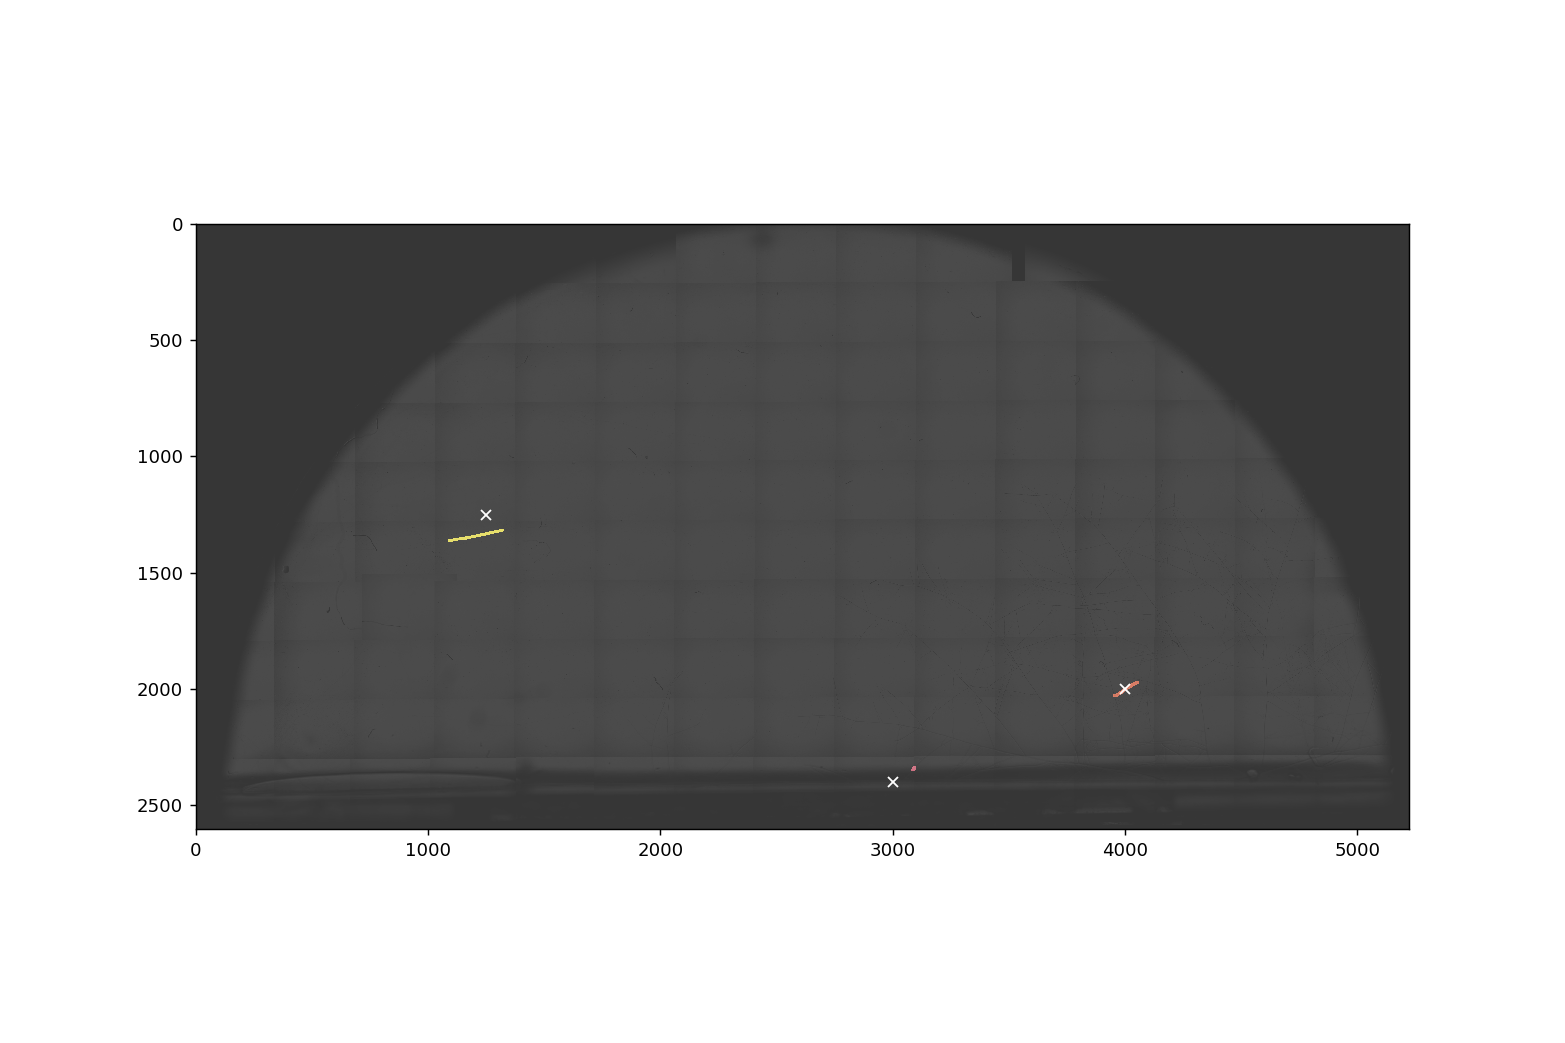

In [55]:
plot_full_image_with_features(exp, 0, downsizing = 10, edges = [edge1, edge2, edge3], points = [c1, c2, c3])

<IPython.core.display.Javascript object>


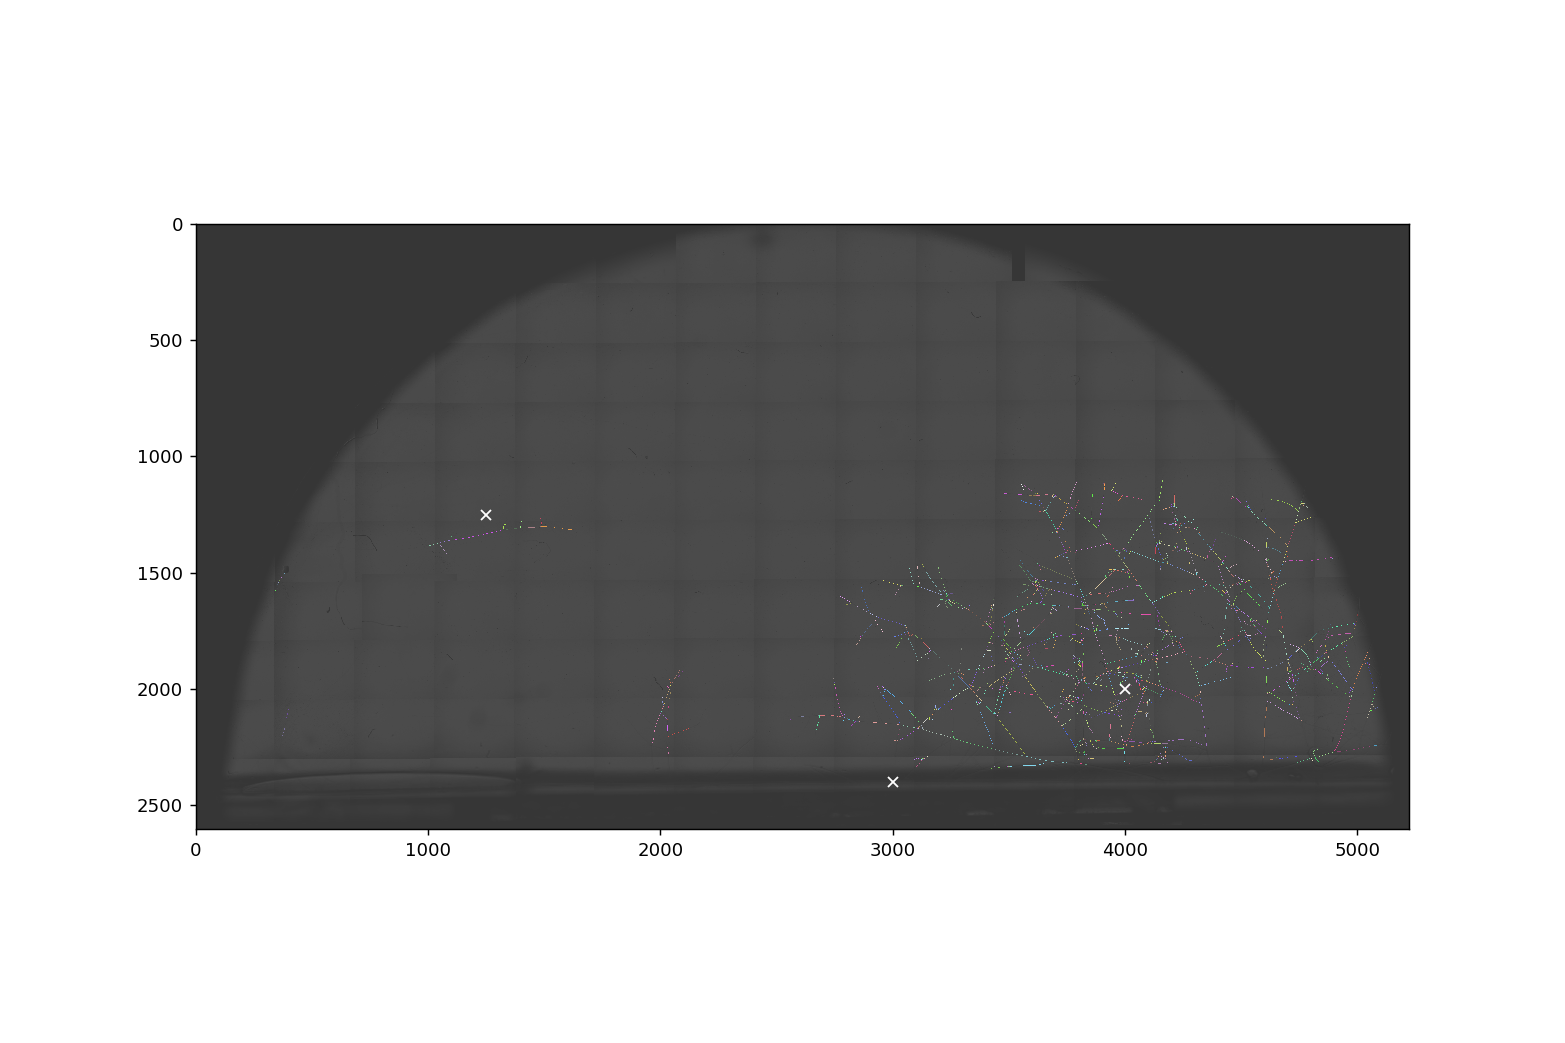

In [48]:
plot_full_image_with_features(exp, 0, downsizing = 10, edges = get_all_edges(exp, 0), points = [c1, c2, c3], dilation = 1)

## Test get nearest edge

In [12]:
def prov(point, exp, t):
    edges = get_all_edges(exp, t)
    l = [edge.pixel_list(t) for edge in edges]
    return edges[get_closest_lines(point, l)[0][0]]

Hyphe 11

In [1]:
coord = [47000, 22467] # General ref

In [15]:
edge = find_nearest_edge(coord, exp, 0)

In [16]:
from amftrack.util.sys import data_path

In [17]:
import os
import json
file_path = os.path.join(data_path, "width1", "measures", "data_width_907_3.json")
with open(file_path) as fil:
    d = json.load(fil)

In [22]:
l = []
for key in d:
    l.append([d[key]['x'],d[key]['y']])

In [23]:
l_ = []
for c in l:
    l_.append(f(c))

In [24]:
edges = get_all_edges(exp, 0)

In [26]:
len(edges)

1652

In [19]:
a = edge.pixel_list(0)[0]

In [23]:
len(edge.pixel_list(0))

806

In [26]:
for e in edge.pixel_list(0):
    print((e[0]-47000)**2+(e[1]-22467)**2)

626227600
626177745
626127892
626078041
626028192
625978345
625928500
625878657
625833209
625783370
625733533
625683698
625633865
625584034
625534205
625484378
625434553
625384730
625334909
625285090
625235273
625239668
625189853
625140040
625090229
625040420
624990613
624940808
624891005
624841204
624791405
624741608
624691813
624642020
624592229
624542440
624492653
624442868
624393085
624343304
624293525
624243748
624193973
624144200
624094429
624044660
623994893
623945128
623895365
623845604
623795845
623746088
623696333
623646580
623596829
623547080
623497333
623447588
623397845
623348104
623298365
623248628
623198893
623149160
623099429
623049700
622999973
622950248
622900525
622850804
622801085
622751368
622701653
622651940
622602229
622552520
622502813
622453108
622403405
622353704
622304005
622258705
622209010
622159317
622109626
622059937
622010250
621960565
621910882
621861201
621811522
621761845
621707773
621658100
621608429
621558760
621509093
621459428
621409765
621360104


In [21]:
coord

[47000, 22467]

<IPython.core.display.Javascript object>


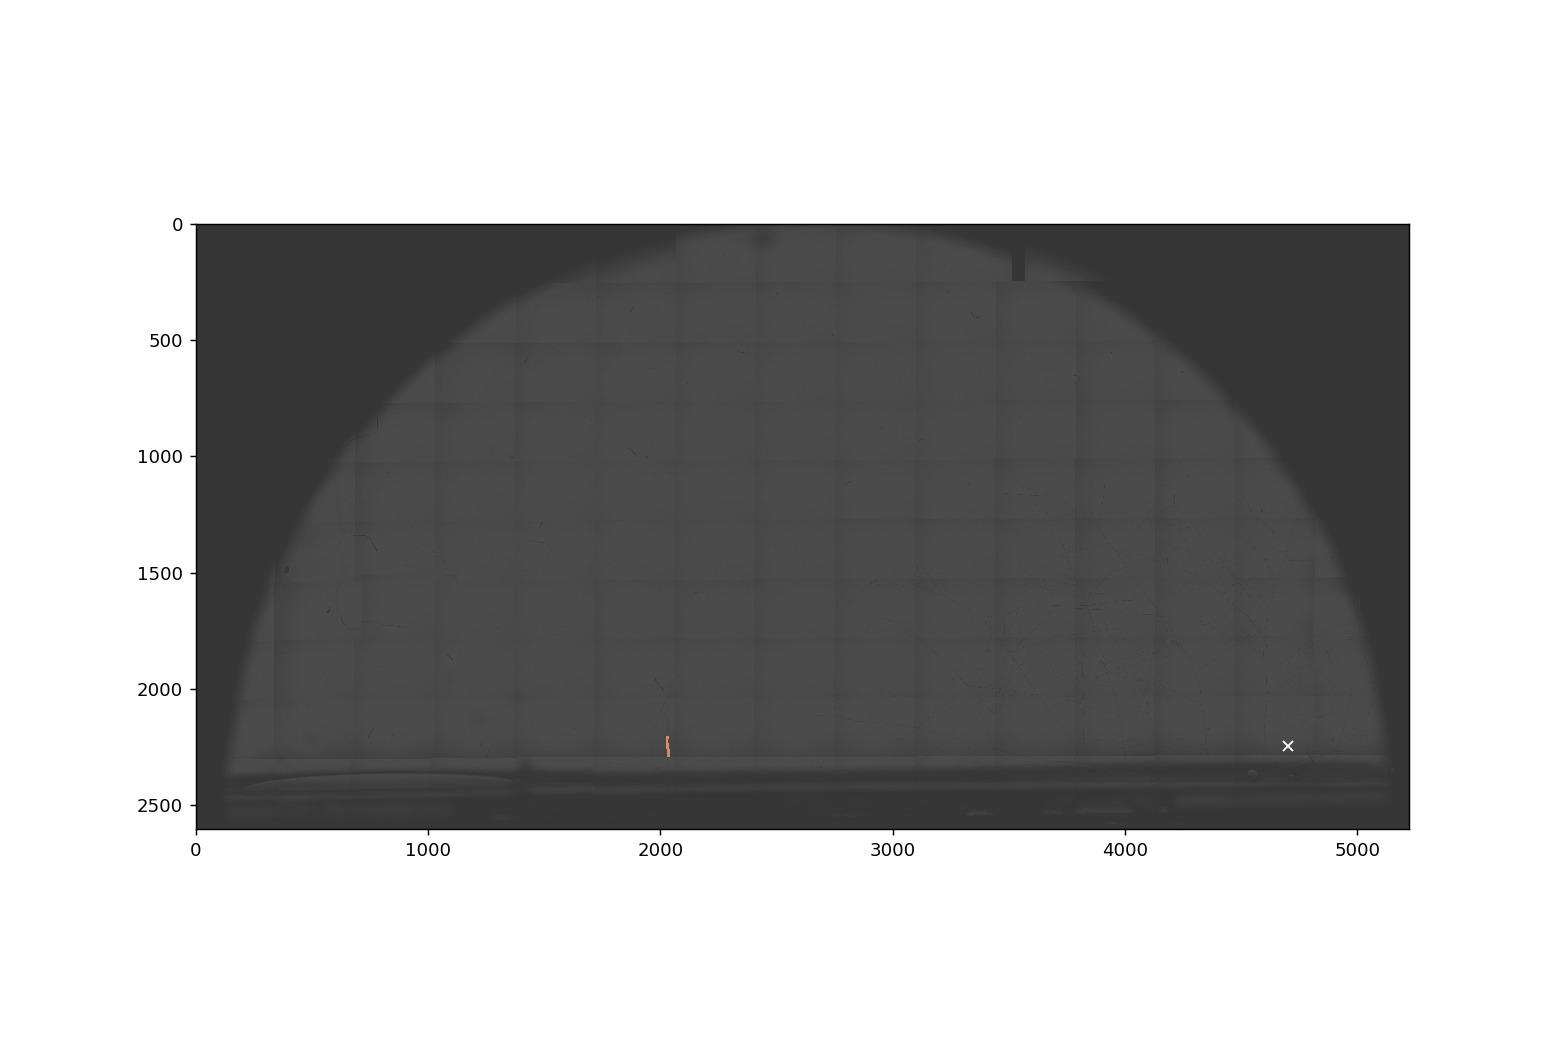

In [18]:
plot_full_image_with_features(exp, 0, downsizing = 10, edges = [edge], points = [coord])

# Récupérer les coordonnées

## Brouillon

<IPython.core.display.Javascript object>


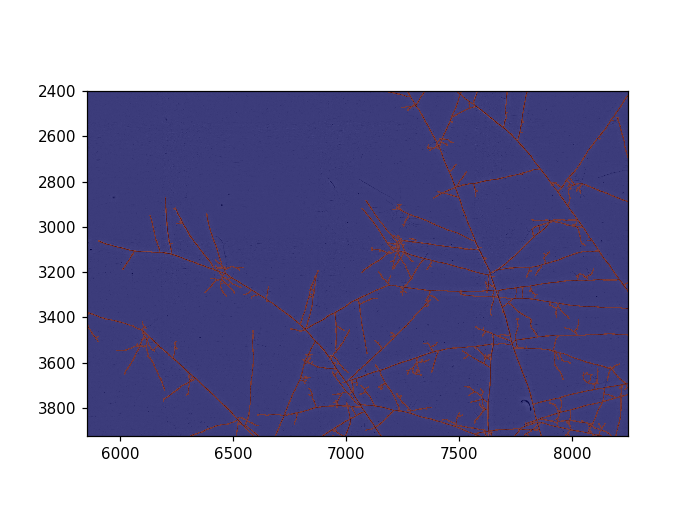

In [21]:
import numpy as np
from pymatreader import read_mat
import cv2
from amftrack.plotutil import plot_t_tp1

folder_list = list(selected_df['total_path'])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5,5),np.uint8)
itera = 1
start = 0

finish = start+2
for folder in folder_list[start:finish]:
    path_snap=folder
    skel_info = read_mat(path_snap+'/Analysis/skeleton_pruned_compressed.mat')
    skel = skel_info['skeleton']
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
    ims.append(im)
    
%matplotlib notebook
plt.close('all')
start = 0
finish = start + 1
for i in range(start,finish):
    plot_t_tp1([], [], None, None, skels[i], ims[i])

<IPython.core.display.Javascript object>


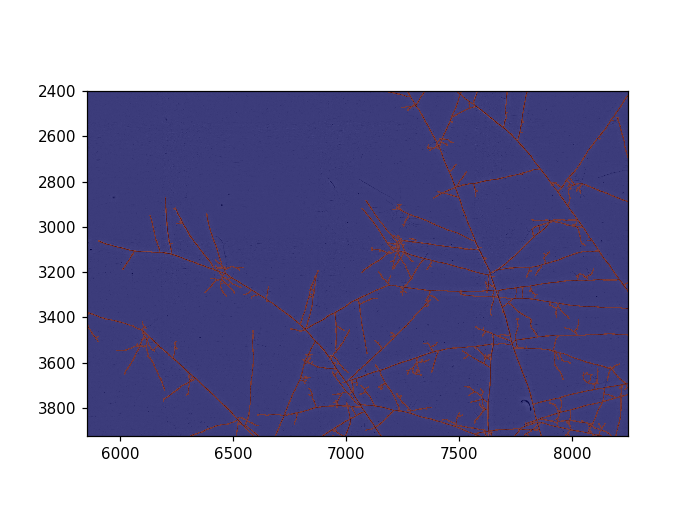

In [21]:
import numpy as np
from pymatreader import read_mat
import cv2
from amftrack.plotutil import plot_t_tp1

folder_list = list(selected_df['total_path'])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5,5),np.uint8)
itera = 1
start = 0

finish = start+2
for folder in folder_list[start:finish]:
    path_snap=folder
    skel_info = read_mat(path_snap+'/Analysis/skeleton_pruned_compressed.mat')
    skel = skel_info['skeleton']
    skels.append(cv2.dilate(skel.astype(np.uint8),kernel,iterations = itera))
    im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
    ims.append(im)
    
%matplotlib notebook
plt.close('all')
start = 0
finish = start + 1
for i in range(start,finish):
    plot_t_tp1([], [], None, None, skels[i], ims[i])